In [80]:
# Dependencies
import pandas as pd

In [81]:
# load CSV
HWI_measurements = "Resources/hawaii_measurements.csv"
HWI_stations = "Resources/hawaii_stations.csv"

In [82]:
# Read with pandas
HWI_measurements_df = pd.read_csv(HWI_measurements)
HWI_stations_df = pd.read_csv(HWI_stations)

HWI_measurements_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [83]:
HWI_measurements_df.count()

station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

In [84]:
clean_HWI_measurements_df = HWI_measurements_df.dropna(how="any")
clean_HWI_measurements_df.count()

station    18103
date       18103
prcp       18103
tobs       18103
dtype: int64

In [85]:
HWI_stations_df.count()

station      9
name         9
latitude     9
longitude    9
elevation    9
dtype: int64

In [86]:
HWI_stations_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [87]:
clean_HWI_measurements_df.to_csv("clean_HWI_measurements_df.csv", sep=',', encoding='utf-8')
clean_HWI_stations_df.to_csv("HWI_stations_df.csv", sep=',', encoding='utf-8')

In [88]:
from numpy import genfromtxt
from time import time
from datetime import datetime
from sqlalchemy import Column, Integer, Float, Date, String, VARCHAR
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import csv
import pandas as pd


#def Load_Data(file_name):
    #data = csv.reader(file_name, delimiter=',')# skiprows=1, converters={0: lambda s: str(s)})
    #return data.tolist()

Base = declarative_base()

class Measurement(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Measurement'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False)
    station = Column(VARCHAR(40))
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Integer)

engine = create_engine('sqlite:///Measurement.sqlite')
Base.metadata.create_all(engine)
file_name1 = 'clean_HWI_measurements_df.csv'
Measurement_df = pd.read_csv(file_name1)
Measurement_df.to_sql(con=engine, index_label='id', name=Measurement.__tablename__, if_exists='replace')


class Station(Base):
    #Tell SQLAlchemy what the table name is and if there's any table-specific arguments it should know about
    __tablename__ = 'Station'
    __table_args__ = {'sqlite_autoincrement': True}
    #tell SQLAlchemy the name of column and its attributes:
    id = Column(Integer, primary_key=True, nullable=False)
    station = Column(VARCHAR(40))
    name = Column(VARCHAR(100))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

engine = create_engine('sqlite:///Station.sqlite')
Base.metadata.create_all(engine)
file_name2 = 'HWI_stations_df.csv'
Station_df = pd.read_csv(file_name2)
Station_df.to_sql(con=engine, index_label='id', name=Station.__tablename__, if_exists='replace')

In [89]:
# Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [97]:
# Create an engine for the Measurement.sqlite database
engine_Measurement = create_engine("sqlite:///Measurement.sqlite")
Base.metadata.create_all(engine_Measurement)

session = Session(bind=engine_Measurement)

In [102]:
engine_Measurement.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(0, 0, 'USC00519397', '2010-01-01', 0.08, 65),
 (1, 1, 'USC00519397', '2010-01-02', 0.0, 63),
 (2, 2, 'USC00519397', '2010-01-03', 0.0, 74),
 (3, 3, 'USC00519397', '2010-01-04', 0.0, 76),
 (4, 5, 'USC00519397', '2010-01-07', 0.06, 70),
 (5, 6, 'USC00519397', '2010-01-08', 0.0, 64),
 (6, 7, 'USC00519397', '2010-01-09', 0.0, 68),
 (7, 8, 'USC00519397', '2010-01-10', 0.0, 73),
 (8, 9, 'USC00519397', '2010-01-11', 0.01, 64),
 (9, 10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [103]:
# Create an engine for the Station.sqlite database
engine_Station = create_engine("sqlite:///Station.sqlite")
Base.metadata.create_all(engine_Station)

session = Session(bind=engine_Station)

In [104]:
engine_Station.execute('SELECT * FROM Station').fetchall()

[(0, 0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (2, 2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (3, 3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (4, 4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (5, 5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (6, 6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (7, 7, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (8, 8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [ ]:
## PART III

In [149]:
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.Measurement
Base.classes.keys()

['Measurement']

In [142]:
session = Session(engine_Measurement)

In [143]:
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

In [144]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [151]:
# Import Matplot lib and use the `nbagg` backend
### BEGIN SOLUTION
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
### END SOLUTION

<IPython.core.display.Javascript object>


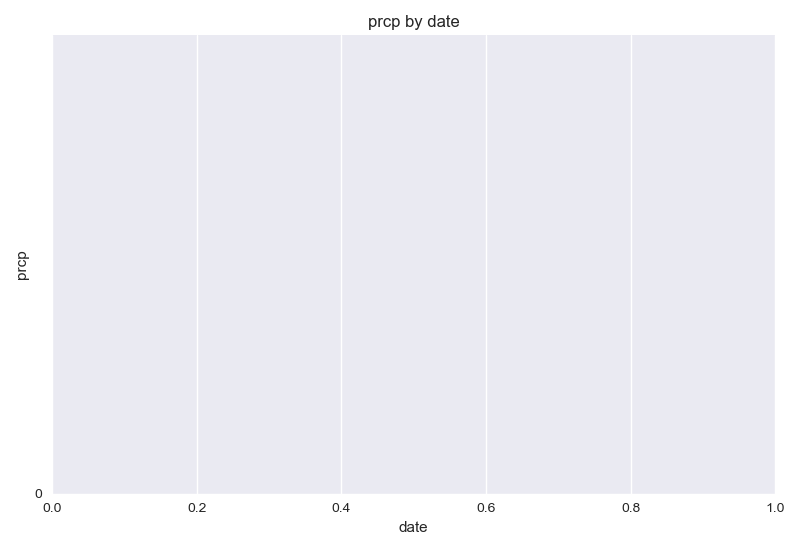

In [156]:
fig, ax = plt.subplots()
ypos = range(0, 1)
ax.set_xlabel("date")
ax.set_ylabel("prcp")
ax.set_yticks(ypos)
ax.set_title("prcp by date")
fig.tight_layout()
fig.show()